In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import os

Displaying landmarks for: Warrior Pose / Warrior Pose 8.jpg


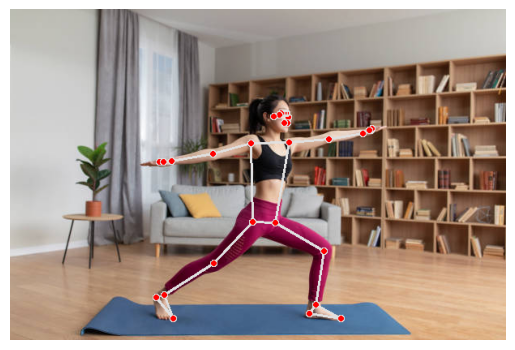

In [9]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import random

# --- Configuration ---
DATASET_PATH = 'dataset'
# Pick a random pose folder
pose_to_check = random.choice(os.listdir(DATASET_PATH))
folder_path = os.path.join(DATASET_PATH, pose_to_check)
# Pick a random image from that folder
random_image_name = random.choice(os.listdir(folder_path))
image_path = os.path.join(folder_path, random_image_name)
# --- End Configuration ---


mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

with mp_pose.Pose(static_image_mode=True) as pose:
    # Read and process the image
    image = cv2.imread(image_path)
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw landmarks on the image
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Display the image
    print(f"Displaying landmarks for: {pose_to_check} / {random_image_name}")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
import streamlit as st
import cv2
import mediapipe as mp
import numpy as np
import pickle

# Load the trained model
with open('yoga_pose_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

st.title("Yoga Pose Detection")
st.write("This app uses your webcam to detect poses using a trained ML model.")

cap = cv2.VideoCapture(0)
frame_placeholder = st.empty()
stop_button_pressed = st.button("Stop")

while cap.isOpened() and not stop_button_pressed:
    ret, frame = cap.read()
    if not ret:
        st.write("The video capture has ended.")
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = pose.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )
        
        try:
            landmarks = results.pose_landmarks.landmark
            row = []
            for lm in landmarks:
                row.extend([lm.x, lm.y, lm.z, lm.visibility])
            
            X = np.array(row).reshape(1, -1)
            pose_name = model.predict(X)[0]
            
            cv2.putText(image, pose_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        except Exception as e:
            cv2.putText(image, "Error", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            
    frame_placeholder.image(image, channels="BGR", use_container_width=True)

cap.release()
cv2.destroyAllWindows()

2025-09-12 22:34:36.284 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 22:34:36.393 
  command:

    streamlit run C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-12 22:34:36.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 22:34:36.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 22:34:36.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 22:34:36.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 22:34:36.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-12 22:35:12.729 Thre